In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import utils
import utils.data_utils as du
import utils.viz_utils as vu
# Cấu hình
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
vu.set_style() # Apply style đẹp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
print("\n1. Loading Data...")
tables = du.load_olist_tables(
    data_path='data',
    verbose=True
)

# Tạo dataset cơ bản (chưa cần feature engineering phức tạp)
df = du.create_base_dataset(tables, merge_strategy='left')
# Lọc đơn đã giao để phân tích lịch sử
df = du.filter_by_conditions(df, {'order_status': ['delivered']}, verbose=False)
print(f"✓ Analysis Dataset Shape: {df.shape}")


1. Loading Data...
✓ Loaded orders: (99441, 8)
✓ Loaded order_items: (112650, 7)
✓ Loaded order_payments: (103886, 5)
✓ Loaded order_reviews: (99224, 7)
✓ Loaded products: (32951, 9)
✓ Loaded sellers: (3095, 4)
✓ Loaded customers: (99441, 5)
✓ Loaded geolocation: (1000163, 5)
✓ Loaded product_category: (71, 2)
Creating base dataset...
Starting with orders: (99441, 8)
After merge reviews: (99992, 11)
After merge order_items: (99992, 16)
After merge customers: (99992, 19)
After merge sellers: (99992, 22)
After merge products: (99992, 29)
After merge category translation: (99992, 30)

✓ Base dataset created: (99992, 30)
✓ Analysis Dataset Shape: (97007, 30)


In [17]:
print("\n2. Data Overview...")
# Chuyển đổi kiểu dữ liệu ngày tháng
date_cols = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Check nhanh missing
du.quick_summary(df)


2. Data Overview...

SUMMARY: DataFrame
Shape: (97007, 30)
Memory: 115.25 MB

Missing values:
                               Missing    Percent
review_comment_message           57908  59.694661
product_category_name_english     1386   1.428763
product_category_name             1367   1.409177
review_score                       646   0.665931
review_creation_date               646   0.665931
product_weight_g                    16   0.016494
product_height_cm                   16   0.016494
product_length_cm                   16   0.016494
product_width_cm                    16   0.016494
order_approved_at                   14   0.014432
order_delivered_customer_date        8   0.008247
order_delivered_carrier_date         2   0.002062

Data types:
object            15
float64           11
datetime64[ns]     3
int64              1
Name: count, dtype: int64



3. Business Trends...


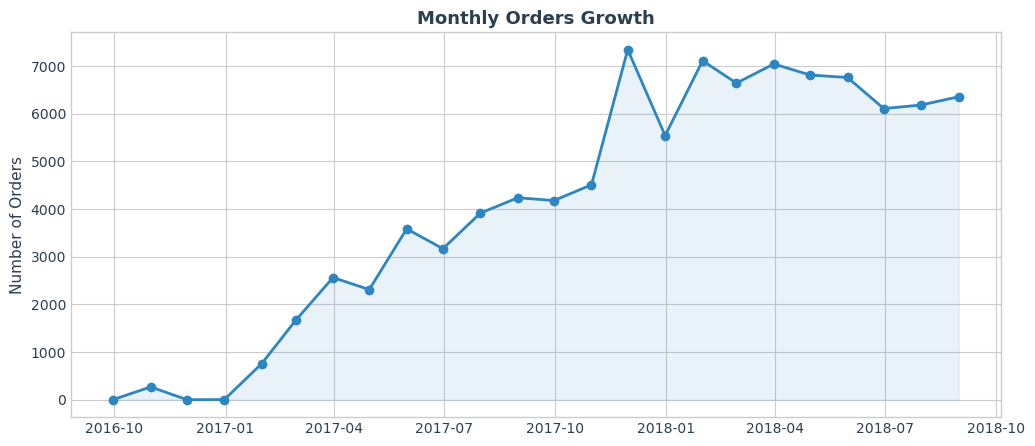

> Insight: Doanh số Olist có xu hướng tăng trưởng mạnh, đặc biệt là đỉnh điểm vào dịp Black Friday (Tháng 11).


In [18]:
print("\n3. Business Trends...")
# Vẽ biểu đồ số lượng đơn hàng theo tháng
vu.plot_orders_trend(df, date_col='order_purchase_timestamp', rule='M', title="Monthly Orders Growth")
plt.show()

# Insight text (Markdown in notebook)
print("> Insight: Doanh số Olist có xu hướng tăng trưởng mạnh, đặc biệt là đỉnh điểm vào dịp Black Friday (Tháng 11).")


4. Customer Geography...


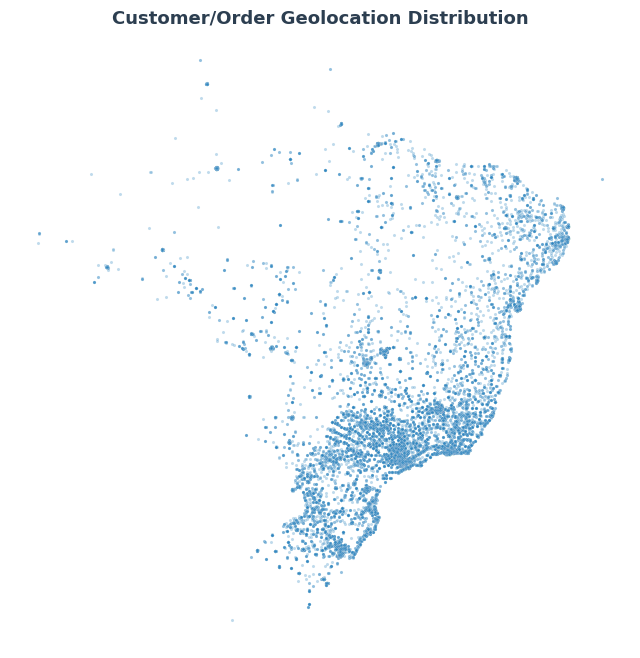

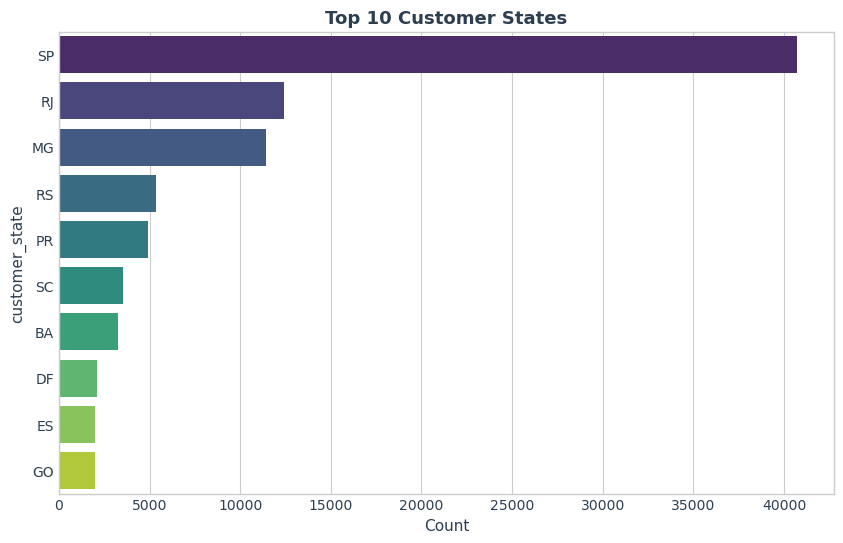

In [19]:
print("\n4. Customer Geography...")
# Vẽ bản đồ phân bố khách hàng
if 'geolocation' in tables:
    geo = tables['geolocation']
    vu.plot_geolocation_map(geo)
    plt.show()

# Top 10 Bang (State)
vu.plot_categorical_count(df, 'customer_state', top_n=10, title="Top 10 Customer States")
plt.show()


5. Product & Price Analysis...


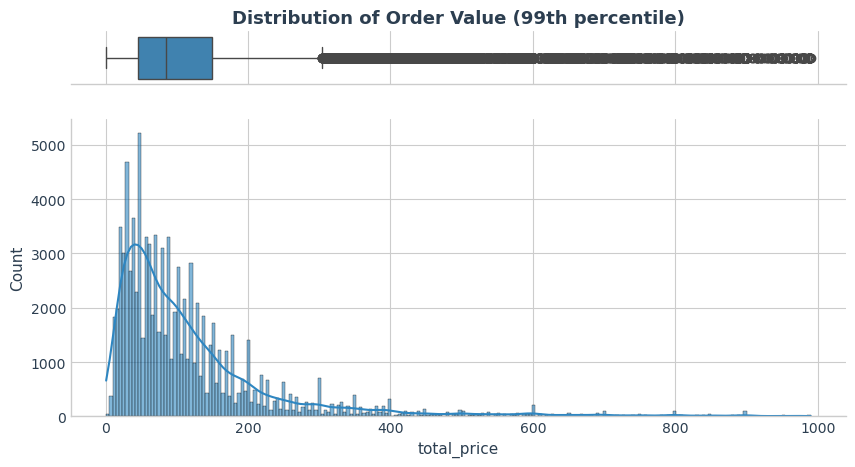

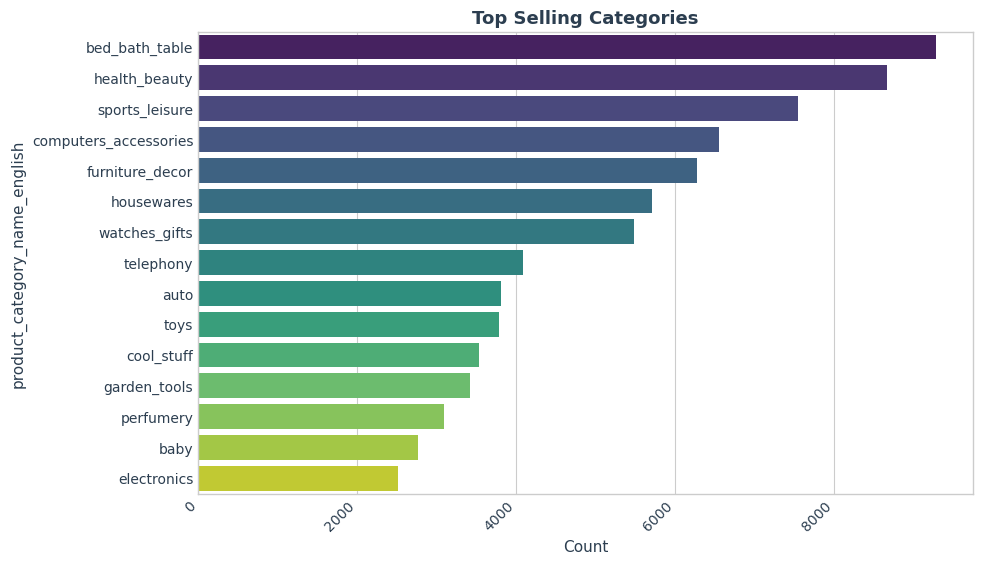

In [20]:
print("\n5. Product & Price Analysis...")
# Phân phối giá trị đơn hàng (Total Price)
# Cần loại bỏ outlier cực lớn để nhìn rõ biểu đồ
q99 = df['total_price'].quantile(0.99)
df_price_view = df[df['total_price'] < q99]

vu.plot_numeric_distribution(df_price_view, 'total_price', title="Distribution of Order Value (99th percentile)")
plt.show()

# Top Product Categories
vu.plot_categorical_count(df, 'product_category_name_english', top_n=15, title="Top Selling Categories")
plt.xticks(rotation=45, ha='right')
plt.show()


6. Customer Satisfaction Analysis...


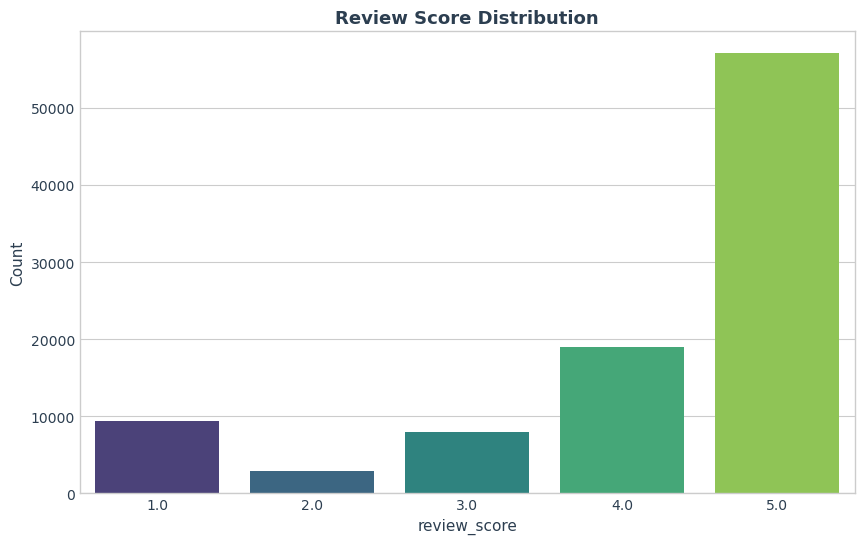

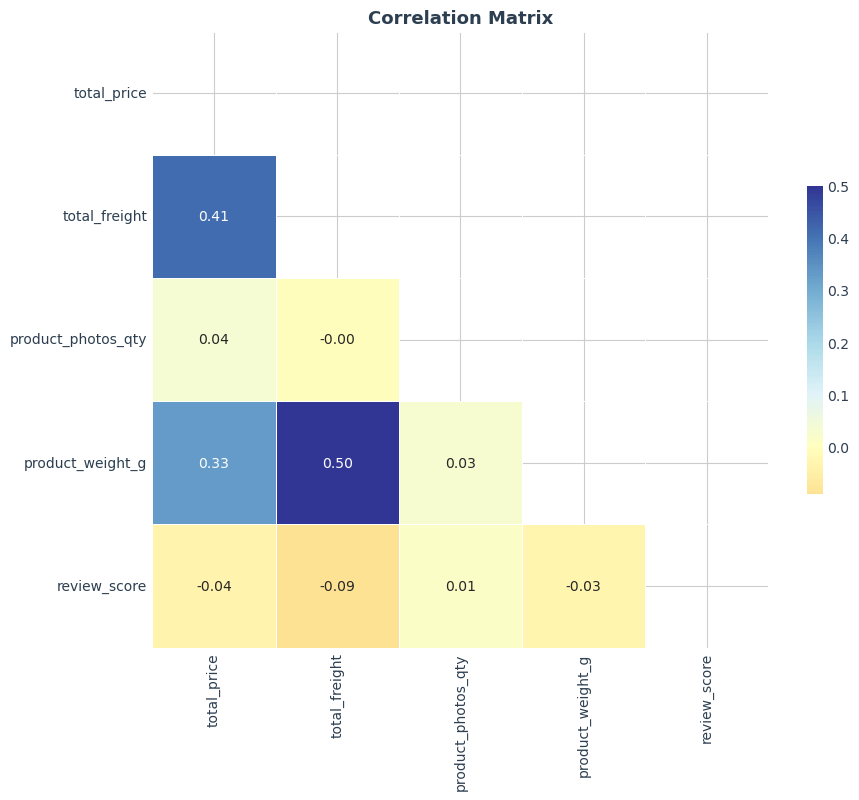

In [26]:
print("\n6. Customer Satisfaction Analysis...")
# Phân phối điểm Review
vu.plot_categorical_count(df, 'review_score', title="Review Score Distribution", horizontal=False)
plt.show()

# Tương quan giữa các biến số (ví dụ: Freight vs Price vs Photos)
num_cols = ['total_price', 'total_freight', 'product_photos_qty', 'product_weight_g', 'review_score']
# Fillna tạm để vẽ
df_corr = df[num_cols].fillna(0)
vu.plot_correlation_heatmap(df_corr, num_cols)
plt.show()


7. What are customers saying? (Word Cloud)...
Generating WordCloud for 12347 negative reviews...


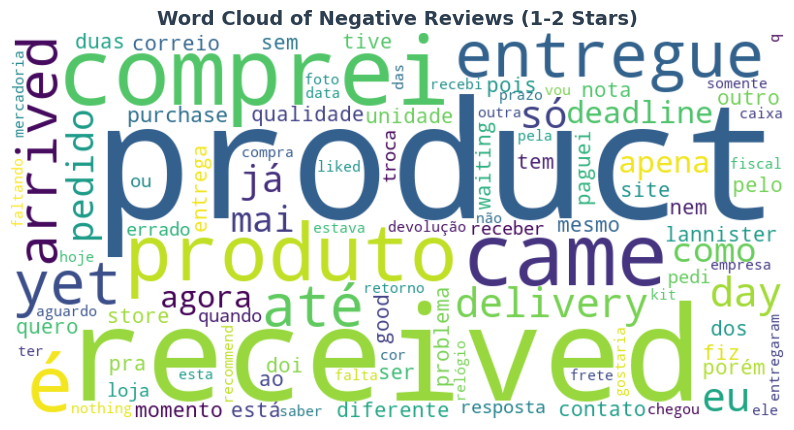

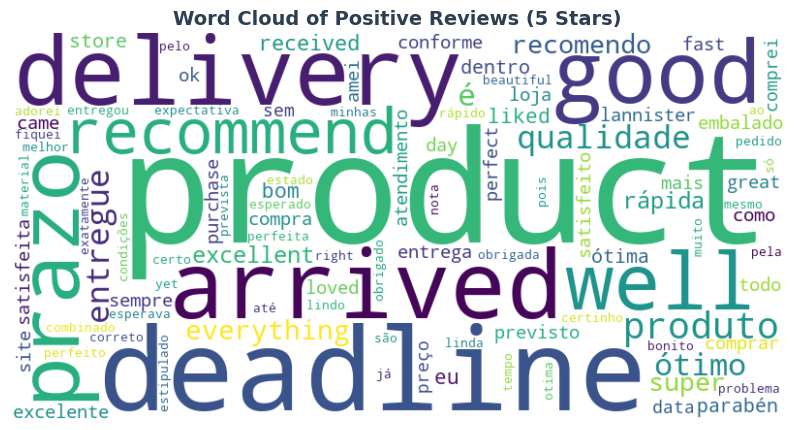


=== EDA COMPLETED ===


In [27]:

print("\n7. What are customers saying? (Word Cloud)...")
# Lọc comment tiêu cực (1-2 sao) để xem vấn đề là gì
bad_reviews = df[df['review_score'] <= 2]['review_comment_message']

print(f"Generating WordCloud for {len(bad_reviews)} negative reviews...")
vu.generate_wordcloud(bad_reviews, title="Word Cloud of Negative Reviews (1-2 Stars)")
plt.show()

# Lọc comment tích cực (5 sao)
good_reviews = df[df['review_score'] == 5]['review_comment_message']
vu.generate_wordcloud(good_reviews, title="Word Cloud of Positive Reviews (5 Stars)")
plt.show()

print("\n=== EDA COMPLETED ===")